<li>Dataset name/description:
Dataset name: motorcycles_sales
</li>
<li>Source: https://moodle.eoppimispalvelut.fi/course/view.php?id=18645</li>
<li>Data format single csv-file</li>
<li>There is sales information of 1061 bikes, this dataset seems to be gathered from showroom or auction. This dataset includes name, selling price, production year, seller type, amount of previous owners , km driven and ex showroom price.

The features used are limited due to lack of data, this limits the amount of correlations and features that can be used in data analyzation of this data.</li>

Code: Module importation, custom functions and loading the data

In [182]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [183]:
%load_ext numpy_html

The numpy_html extension is already loaded. To reload it, use:
  %reload_ext numpy_html


In [184]:
%%html
<style>
table {margin-top: 16pt;}
td {font-family: Arial, Helvetica, sans-serif !important; font-weight: 600; white-space: normal !important;}
tr:nth-child(even) {background: #b0d9eb !important; color: black}
tr:nth-child(odd) {background: #8fb1bf !important; color: black}
</style>

In [185]:
# Read the motorcycle_sales.csv
df = pd.read_csv("motorcycle_sales.csv")

<h2>Code: Data Cleaning process</h2>

In [186]:
# Display the df
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [187]:
# Find any missing values within the dataframe
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [188]:
# Find value counts of name column
df['name'].value_counts()

name
Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
                                 ..
Hero Honda CD100SS                1
Royal Enfield Thunderbird 500     1
BMW G310GS                        1
TVS Radeon                        1
Bajaj  ct 100                     1
Name: count, Length: 279, dtype: int64

In [189]:
# Find column names
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [190]:
# Use df.info to see dtypes and Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [191]:
# Fill missing values within ex_showroom_price
df['ex_showroom_price'].fillna(0, inplace=True)

# Display the df
df.sort_values(by='selling_price', ascending=False)

C:\Users\Archoste\AppData\Local\Temp\ipykernel_16628\612312377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(0, inplace=True)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0
289,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600,599000.0
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0
...,...,...,...,...,...,...,...
77,Honda Dio,7500,2009,Individual,2nd owner,16000,0.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,0.0
567,Bajaj Super,6000,1991,Individual,1st owner,35000,0.0
748,Honda Activa [2000-2015],6000,2006,Individual,2nd owner,35000,50267.0


In [192]:
# Replace 1st and 2nd owner with numerical values, 1st owner with 1 and 2nd with 2
df['owner'] = df['owner'].replace({'1st owner': '1', '2nd owner': '2'})

# Display dataframe
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,0.0
1,Honda Dio,45000,2017,Individual,1,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,0.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1,53000,58000.0


In [193]:
# Drop seller_type column
df.drop('seller_type', axis=1)

,name,selling_price,year,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,1,350,0.0
1,Honda Dio,45000,2017,1,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,2,21000,0.0
...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1,500000,52000.0
1057,Honda CB twister,16000,2012,1,33000,51000.0
1058,Bajaj Discover 125,15000,2013,2,35000,57000.0
1059,Honda CB Shine,12000,2009,1,53000,58000.0


In [194]:
# Define function to get procentual price difference comparing price with km driven
def procentual_price_diff(row):
    selling = row['selling_price']
    driven = row['km_driven']

    # the difference in decimal format
    result = 1 - round(selling / driven, 2)
    return result

In [195]:
# Apply the function above to the df
df['price difference'] = df.apply(procentual_price_diff, axis=1)

<h2>Code: Data analysis</h2>

<Axes: >

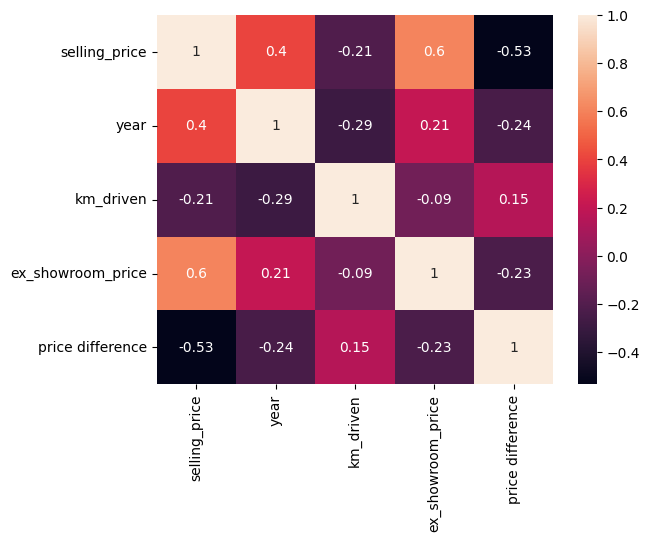

In [196]:
# Create correlation matrix to see correlations within the dataframe
correlations = df.corr(numeric_only=True)

# plot correlation matrix
sns.heatmap(correlations, annot=True)

<li>Selling price seems to correlate with ex_showroom_price and year, year has intermediate correlation as ex_showroom_price seems to have high correlation. Let's what happens whens we remove 0 values within ex_showroom_price. There is noticable negative correlation with km_driven and Price_difference compared to selling price, price difference tells us how km_driven affects the price. Here we can see that the more motorcycle is driven the less more likely it's going to have high price.</li>

In [197]:
# Drop rows where 'km_driven' column is 0
df = df.loc[df['km_driven'] != 0]

<Axes: >

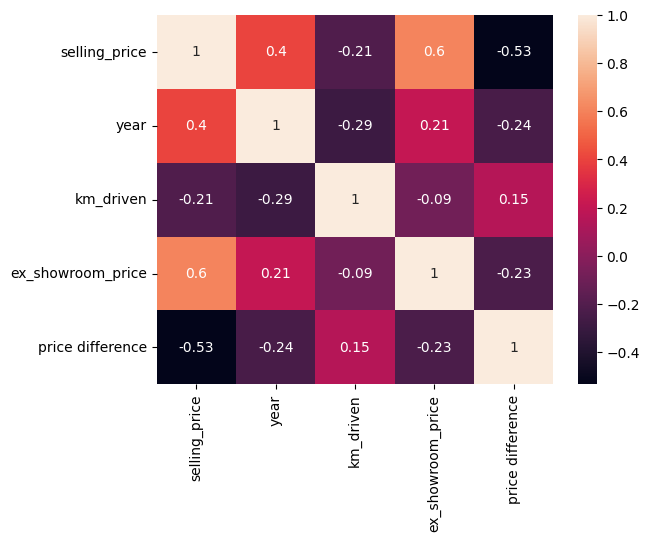

In [198]:
# Create correlation matrix to see correlations within the dataframe
new_correlations = df.corr(numeric_only=True)

# plot correlation matrix
sns.heatmap(correlations, annot=True)

<li>This is interesting, nothing seems to change.</li>

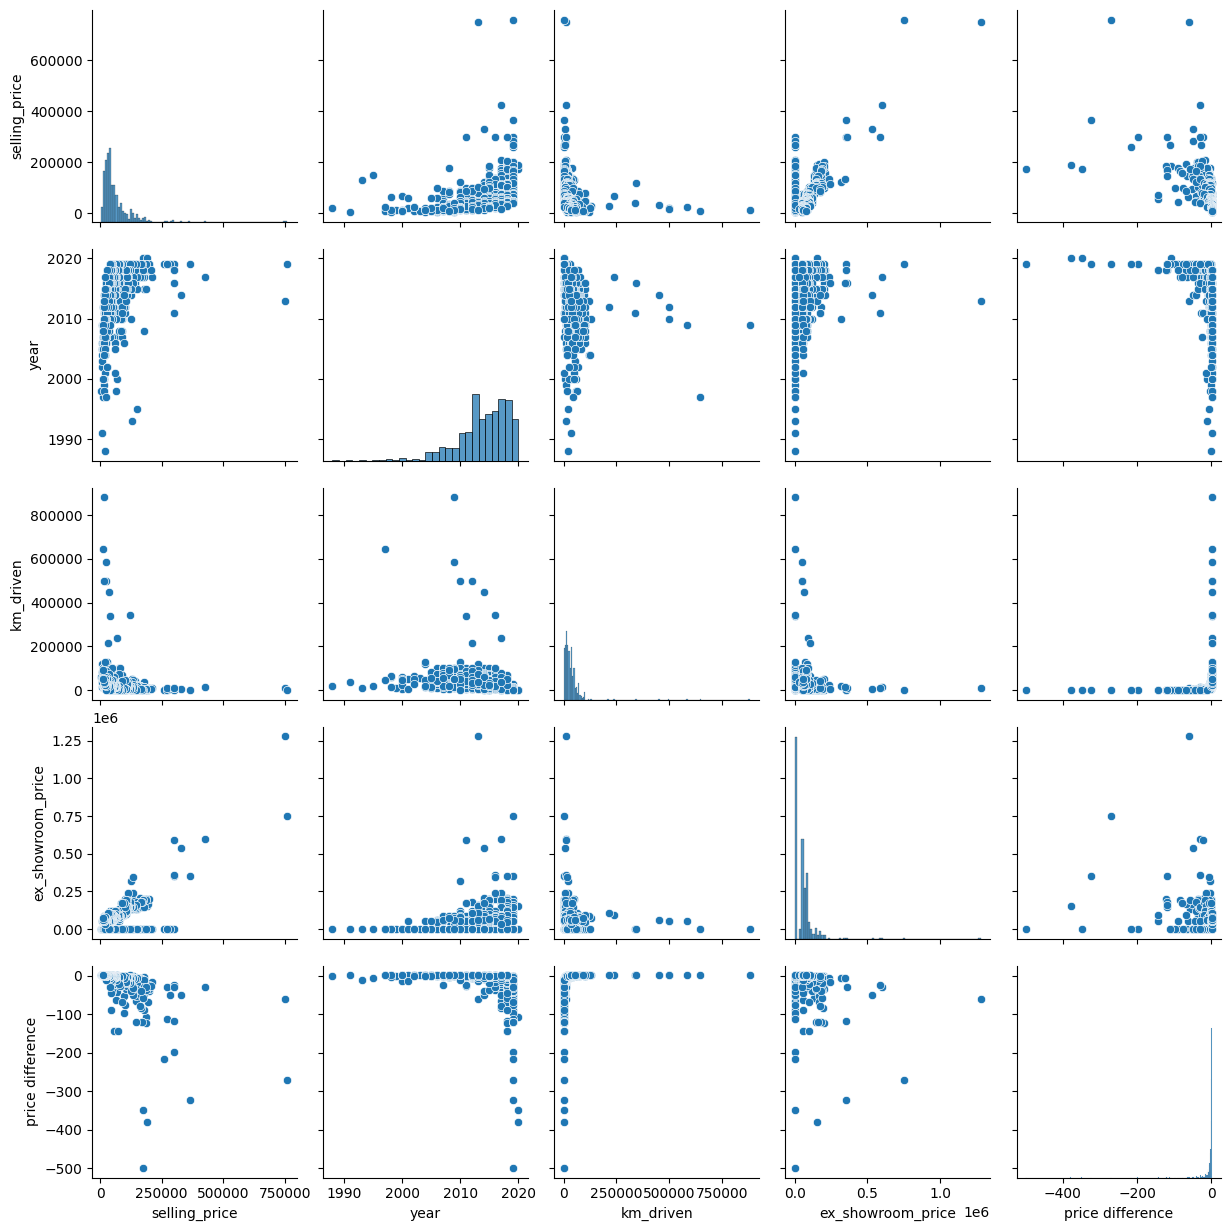

In [199]:
# Create pairplot for motorcycles dataframe
sns.pairplot(df)

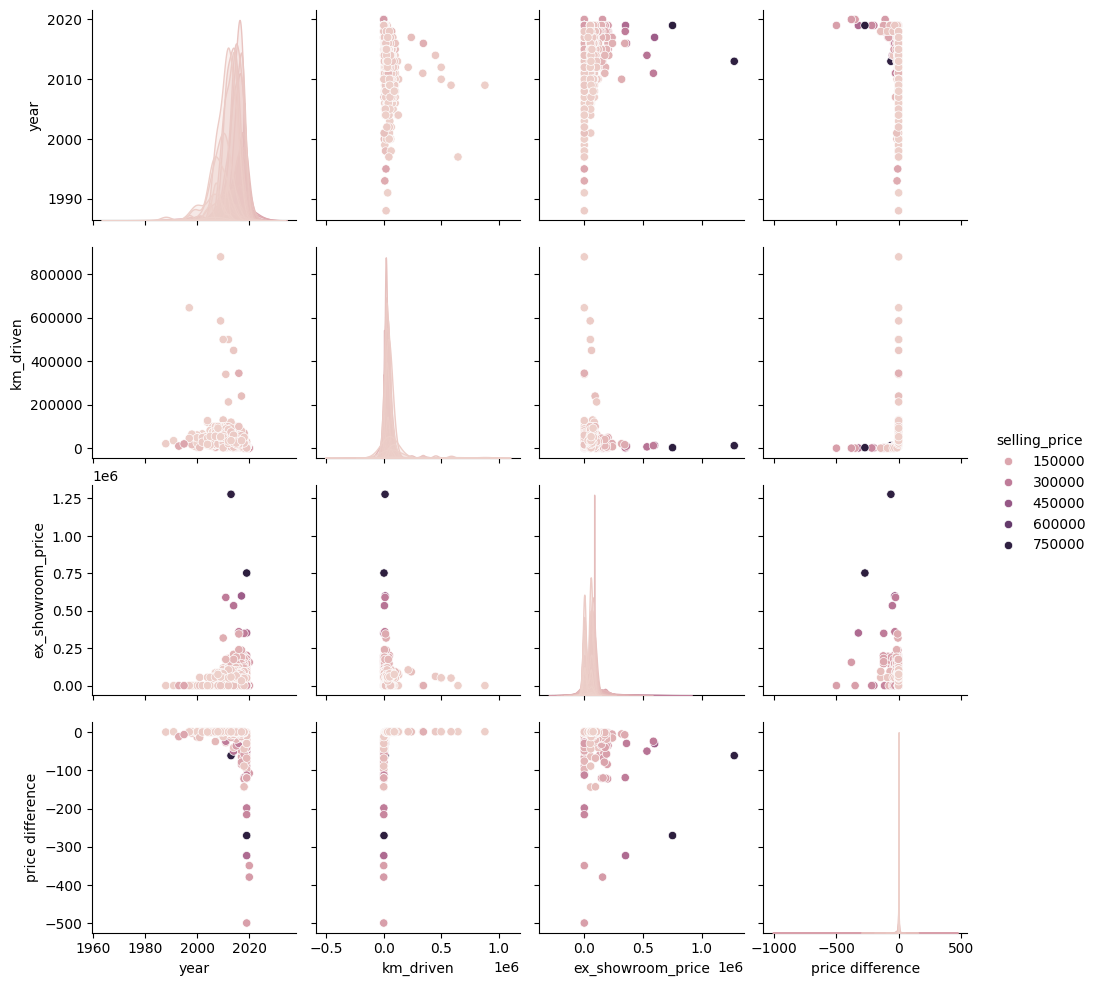

In [200]:
# Use selling price as a hue for pairplot
sns.pairplot(df, hue='selling_price')

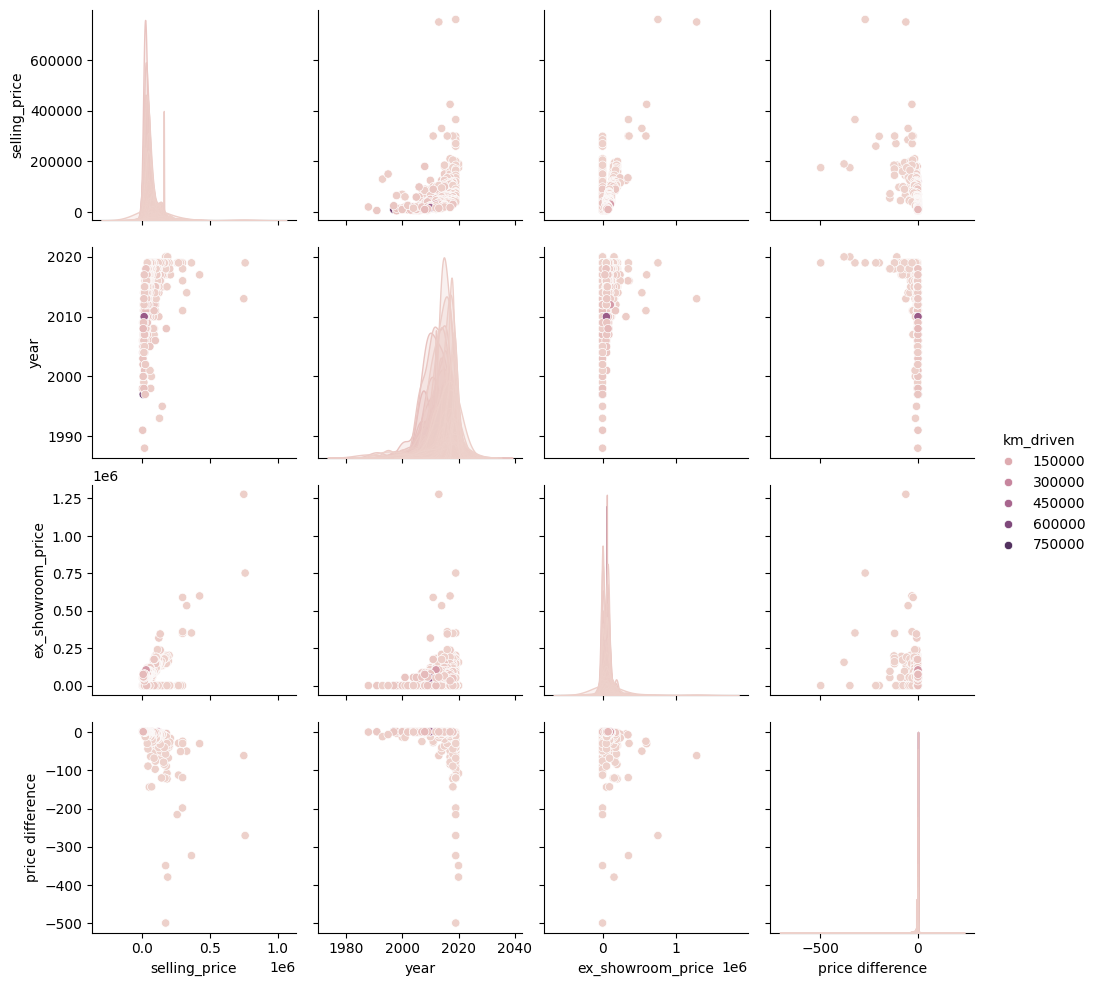

In [201]:
# Use km_driven as a hue for pairplot
sns.pairplot(df, hue='km_driven')

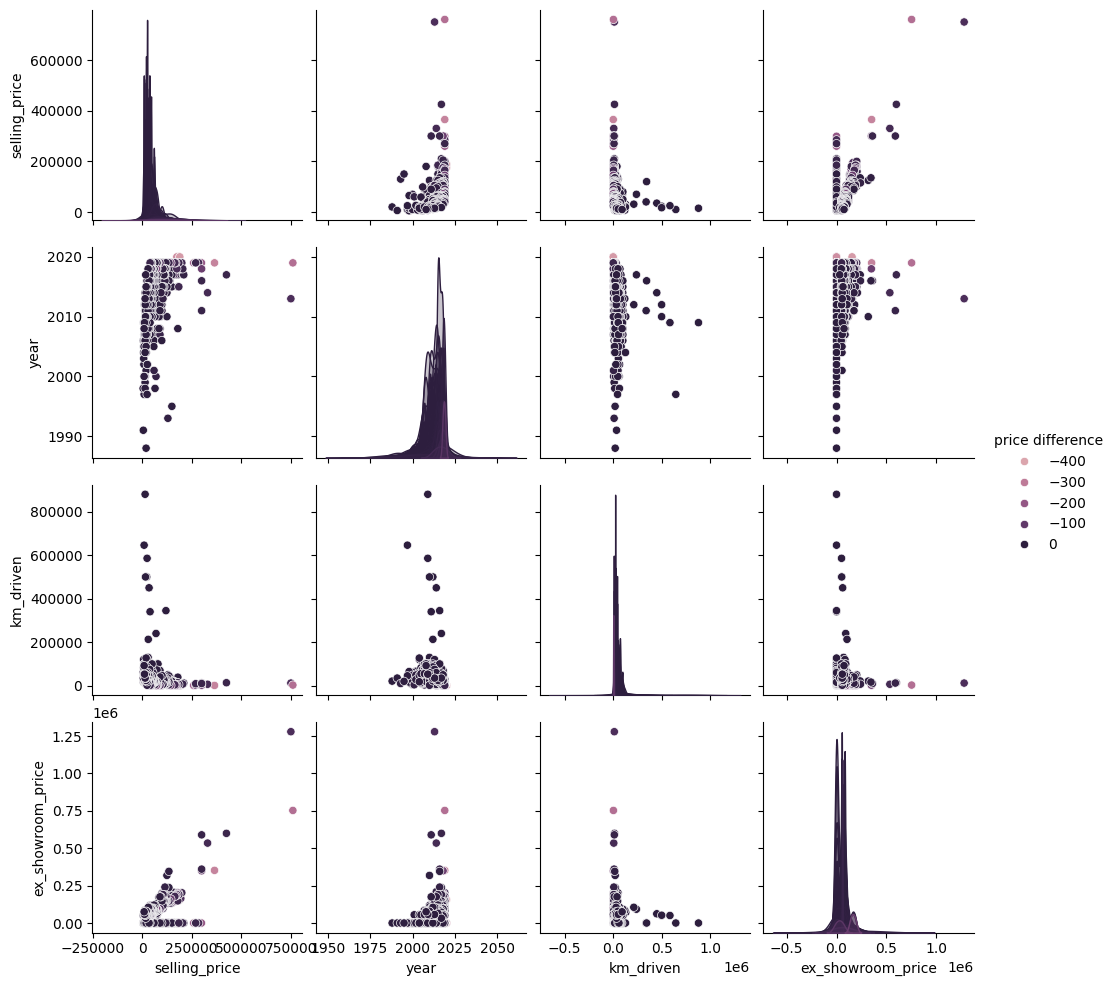

In [202]:
# Use price difference as a hue for pairplot
sns.pairplot(df, hue='price difference')

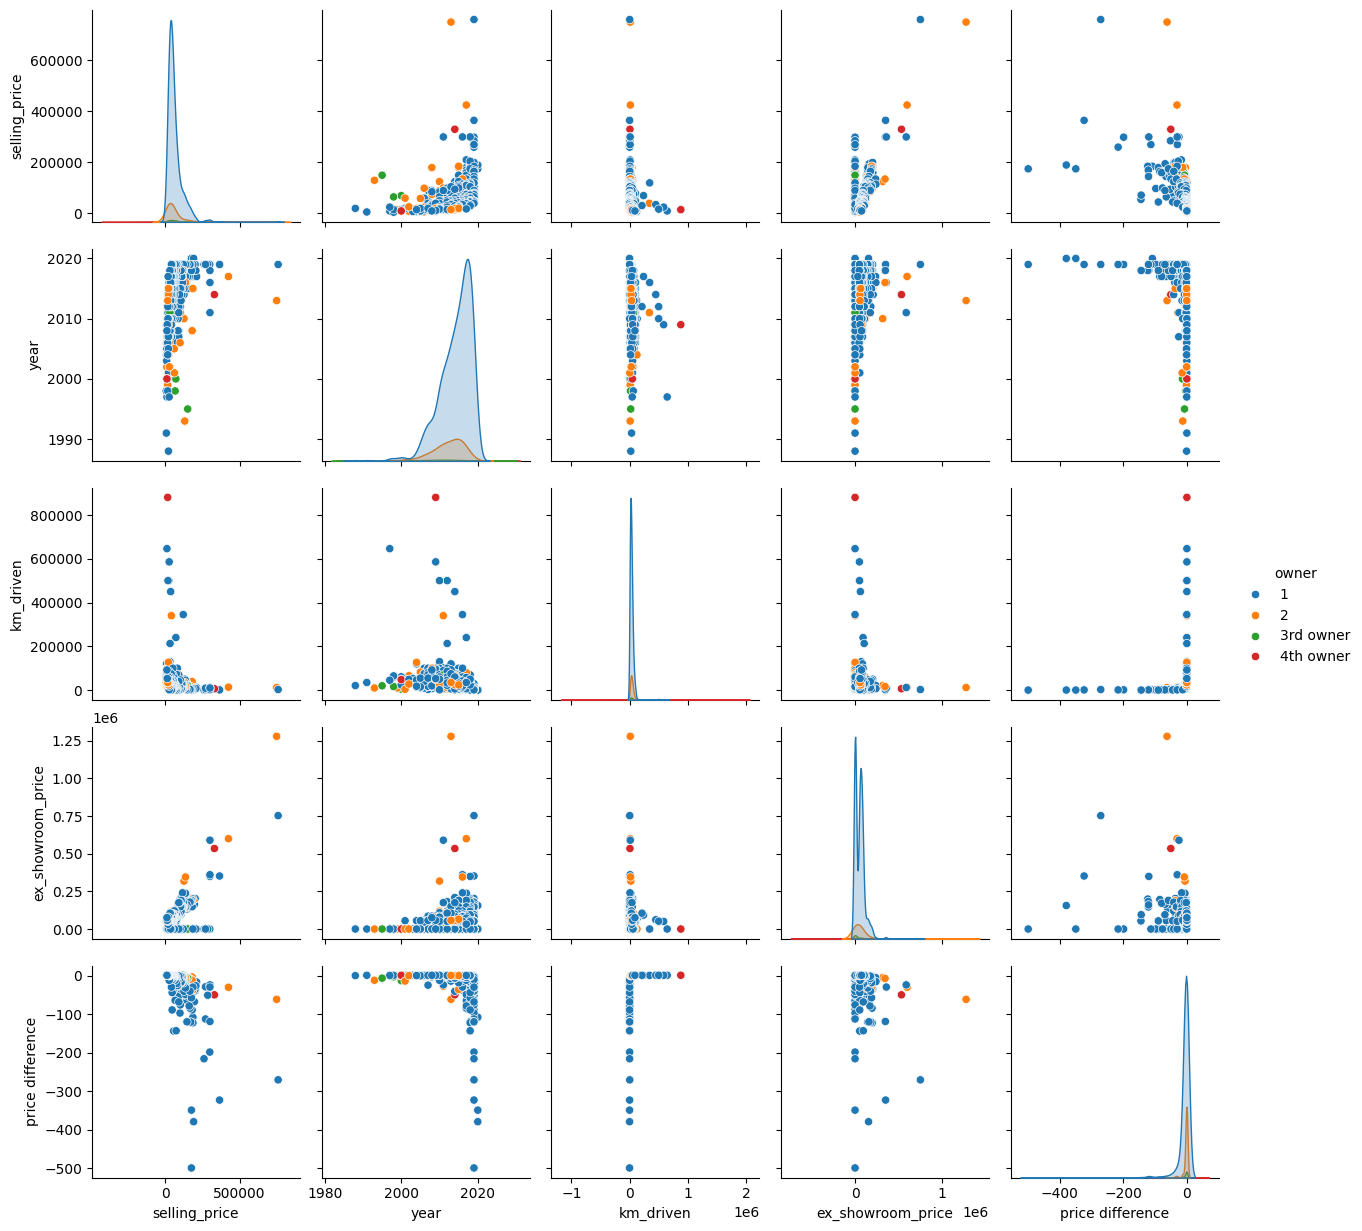

In [203]:
# Use km_driven as a hue for pairplot
sns.pairplot(df, hue='owner')

<Axes: xlabel='year', ylabel='selling_price'>

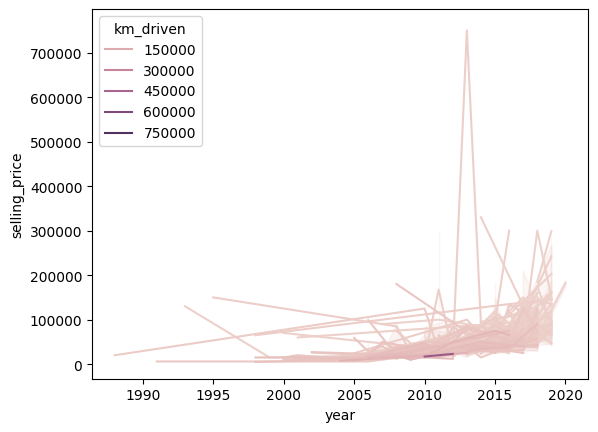

In [204]:
# Try using regression plot for this dataset
sns.lineplot(x='year', y='selling_price', data=df, hue="km_driven")

This seems to do the same in every plot and in every way I try.

In [205]:
# Find the row with the highest selling price
max_selling_price= df.loc[df['selling_price'].idxmax()]

# Display the highest selling price
max_selling_price

name                 Suzuki GSX S750
selling_price                 760000
year                            2019
seller_type               Individual
owner                              1
km_driven                       2800
ex_showroom_price           752020.0
price difference             -270.43
Name: 295, dtype: object

In [206]:
# Find the row with the highest selling price
max_selling_price= df.loc[df['selling_price'].idxmax()]

# Display the highest selling price
max_selling_price

name                 Suzuki GSX S750
selling_price                 760000
year                            2019
seller_type               Individual
owner                              1
km_driven                       2800
ex_showroom_price           752020.0
price difference             -270.43
Name: 295, dtype: object

In [207]:
# Find the row with the lowest selling price
min_selling_price = df.loc[df['selling_price'].idxmin()]

# Display the highest selling row
min_selling_price

name                  TVS Excel
selling_price              5000
year                       1998
seller_type          Individual
owner                         1
km_driven                 60000
ex_showroom_price           0.0
price difference           0.92
Name: 543, dtype: object

<h2>Results and summary:<h2>

<li> It seems like selling price correlates with the production year quite well, price difference seems to have some affection, but not as much to newer models as to older ones. The more owners motorcycle seems to have the more it seems to have been driven. Ex showroom price also seems to correlate with the selling price, the selling price seems to often higher than ex showroom price, there can be seen difference. We can also see that the less mileage and the less owners, but also the less km_driven the higher the price. This we can also think from the heatmap. There is more factors like brand and the popularity of it.</li>

<li> Summary: 
Less mileage with older bikes seems to correlate with higher price, mileage does matter on newer bikes, but only if the same brand, model and production year bike has less mileage. I can't make that big conclusions only assumptions and trust my knowledge and recearch.</li>

<h2>Ideas for futher improvements:</h2>

<li> This could be done with bigger dataset as we can't make that many assumptions from this small dataset, so I can use more features and come with some conclusions. Data could also be distributed little bit better, like Brand and Model in different columns so data analyzation could be easier to complete, come to in conclusion and to visualize.</li>


I did try boxplots, lineplots, regression plots with the columns etc, but all came out terribly visualized. I could only use the pairplots, that I did, if there is any improvements I could make, let me know.